In [1]:
import pandas as pd

In [2]:
df_tech = pd.read_csv('products_technology.csv')

In [4]:
duplicates = df_tech.duplicated()
print(f'Number of duplicates rows: {duplicates.sum()}')

df_tech = df_tech.drop_duplicates()

Number of duplicates rows: 0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

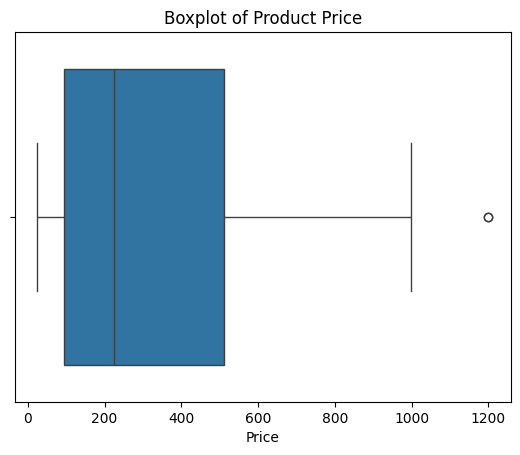

In [6]:
sns.boxplot(x=df_tech['Price'])
plt.title('Boxplot of Product Price')


df_tech = df_tech[df_tech['Price'] <= 1500 ]

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_tech[['Price','Stock']] = scaler.fit_transform(df_tech[['Price','Stock']])
print(df_tech.head())

   ProductID      ProductName     Category     Price     Stock  Rating
0          1    Laptop Pro 15    Computers  1.000000  0.122807     4.5
1          2   Wireless Mouse  Accessories  0.000000  0.649123     4.2
2          3       4K Monitor     Monitors  0.234043  0.228070     4.7
3          4  Gaming Keyboard  Accessories  0.042553  0.473684     4.6
4          5     Smartphone X       Mobile  0.828936  0.298246     4.8


In [9]:
df_tech['Revenue_Potential'] = df_tech['Price'] * df_tech['Stock']
print(df_tech['Revenue_Potential'])

0     0.122807
1     0.000000
2     0.053378
3     0.020157
4     0.247227
5     0.133259
6     0.016797
7     0.028742
8     0.072788
9     0.027996
10    0.034714
11    0.004255
12    0.026950
13    0.017544
14    0.036954
15    0.010078
16    0.013960
17    0.069056
18    0.030235
19    0.000000
Name: Revenue_Potential, dtype: float64


In [10]:
df_tech['Rating_Category'] = pd.cut(df_tech['Rating'],bins=[0,3,4,5],labels=['Low','Medium','High'])
print(df_tech[['ProductName','Rating','Rating_Category']].head())

       ProductName  Rating Rating_Category
0    Laptop Pro 15     4.5            High
1   Wireless Mouse     4.2            High
2       4K Monitor     4.7            High
3  Gaming Keyboard     4.6            High
4     Smartphone X     4.8            High


In [11]:
grouped = df_tech.groupby(['Category','Rating_Category'])[['Price','Stock']].mean()
print(grouped)

                                Price     Stock
Category    Rating_Category                    
Accessories Low                   NaN       NaN
            Medium                NaN       NaN
            High             0.077447  0.607018
Audio       Low                   NaN       NaN
            Medium                NaN       NaN
            High             0.106383  0.473684
Cameras     Low                   NaN       NaN
            Medium                NaN       NaN
            High             1.000000  0.000000
Components  Low                   NaN       NaN
            Medium                NaN       NaN
            High             0.574468  0.017544
Computers   Low                   NaN       NaN
            Medium                NaN       NaN
            High             0.829787  0.087719
Mobile      Low                   NaN       NaN
            Medium                NaN       NaN
            High             0.595319  0.333333
Monitors    Low                   NaN   

C:\Users\francis\AppData\Local\Temp\ipykernel_19904\1575187148.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_tech.groupby(['Category','Rating_Category'])[['Price','Stock']].mean()


In [12]:
# Create a pivot table for average price by category and rating category
pivot_table = df_tech.pivot_table(values='Price', index='Category', columns='Rating_Category', aggfunc='mean')
print(pivot_table)

Rating_Category    Medium      High
Category                           
Accessories           NaN  0.077447
Audio                 NaN  0.106383
Cameras               NaN  1.000000
Components            NaN  0.574468
Computers             NaN  0.829787
Mobile                NaN  0.595319
Monitors              NaN  0.234043
Networking            NaN  0.080851
Smart Home            NaN  0.191489
Storage          0.046809  0.106383
Wearables             NaN  0.276596


C:\Users\francis\AppData\Local\Temp\ipykernel_19904\832249034.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_tech.pivot_table(values='Price', index='Category', columns='Rating_Category', aggfunc='mean')


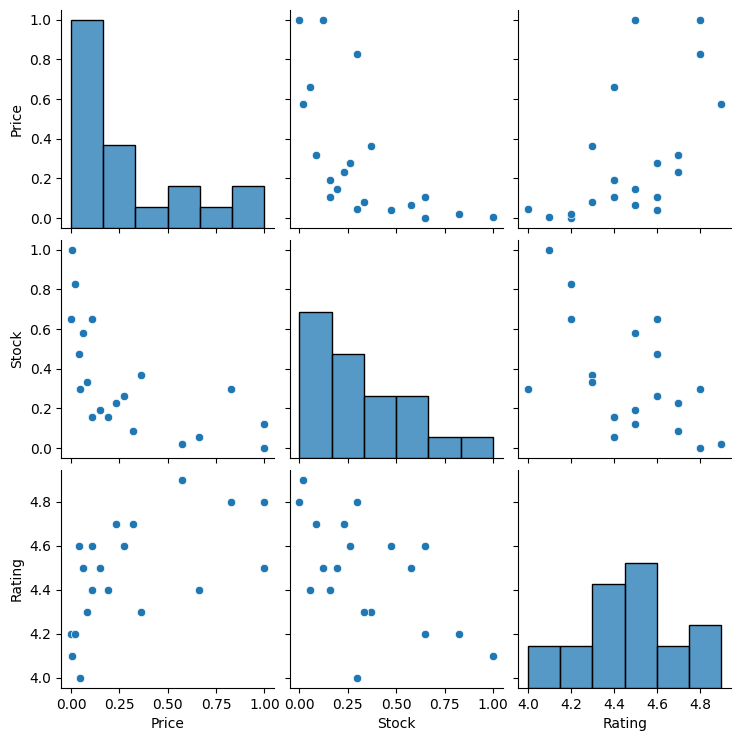

In [13]:
sns.pairplot(df_tech[['Price','Stock','Rating']])
plt.show()

In [ ]:
audi_product_100 = df_tech.query("Category == 'Computers' and Price > 50")

print(audi_product_100)

Empty DataFrame
Columns: [ProductID, ProductName, Category, Price, Stock, Rating, Revenue_Potential, Rating_Category]
Index: []
